## Crop/select aera and calculate cloud fraction should be done in the same period.

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [2]:
#path = '/uio/lagringshotell/geofag/students/metos/hannasv/MSG_0_degree_2009/'
#add = "archive.eumetsat.int/umarf/onlinedownload/hannasv/1336736/"

In [3]:
path = '/home/hanna/Desktop/master_thesis/meteosat0/'
era_path = '/home/hanna/Desktop/master_thesis/era/'

In [4]:
files = glob.glob(path+"*.grb")

In [5]:
first_file = files[0]

In [6]:
files

['/home/hanna/Desktop/master_thesis/meteosat0/MSG4-SEVI-MSGCLMK-0100-0100-20190515001500.000000000Z-20190515002918-1333744.grb',
 '/home/hanna/Desktop/master_thesis/meteosat0/MSG4-SEVI-MSGCLMK-0100-0100-20190515000000.000000000Z-20190515001341-1333744.grb']

In [7]:
import datetime

In [8]:
def timestamp(filename):
    """
    Returns the np.datetime64 [ns] for the current date.
    """
    splits = filename.split('-')
    ts = splits[5]
    year = ts[:4]
    month = ts[4:6]
    day = ts[6:8]
    hr = ts[8:10]
    minuts = ts[10:12]
    sek = ts[12:-1]
    return np.datetime64( year+"-"+month+"-"+day+"T"+hr+":"+minuts+":"+sek )

In [9]:
def fix_one_sat_file(filename):
    """
    filename : str
        full absoulute path to file.
    
    This reads a raw satelite file.
    Add time, longitude, latitude.
    """
    data = xr.open_dataset(filename, engine="pynio")

    ts = timestamp(filename)
    data['time'] = ts
    
    # Add time as a coordinate and dimension. 
    data = data.assign_coords(time = data.time)

    # TODO :: dimensions with coordinates
    #data = data.assign_coords(latitude = np.arange(-67.5, 67.5, 3712))
    #data = data.assign_coords(longitude = np.arange(-67.5, 67.5, 3712))    
    
    data['xgrid_0'] = np.linspace(-67.5, 67.5, 3712)
    data['ygrid_0'] = np.linspace(-67.5, 67.5, 3712)

    
    data = data.expand_dims(dim = 'time' )
        
    # Rename dimenstions and coordinates 
    data = data.rename(name_dict={'xgrid_0': 'longitude', 
                                  'ygrid_0':'latitude', 
                                  'CLOUDM_P30_GSV0_I207':'tcc'}, inplace=True)
    # crop to correct region 
    # TODO :: import region
    data = data.sel(latitude = slice(30,60))
    data = data.sel(longitude = slice(-15, 42))

    # Check that it contains no 4's
    nr_4 = (data.tcc == 3.0).sum().values
    if nr_4 > 0:
        print( nr_4 )
    else:
        print("We are all good.")
        
    # Replace values --> final result cloud = 1, no_cloud = 0.
    # currently not replacing any values.
    data = data.where(data.tcc - 1 < 0.0001, 0)
        
    return data

In [10]:
np.linspace(-67.5, 67.5, 3712)

array([-67.5       , -67.46362167, -67.42724333, ...,  67.42724333,
        67.46362167,  67.5       ])

In [11]:

#np.sqrt(13778944)

In [12]:
dset = fix_one_sat_file(first_file)
dset1 = fix_one_sat_file(files[1])

/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.


79645
79645


/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.


In [13]:
dset.merge(dset1)

<xarray.Dataset>
Dimensions:    (latitude: 824, longitude: 1567, time: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-05-15 2019-05-15T00:15:00
  * longitude  (longitude) float64 -14.97 -14.93 -14.9 ... 41.93 41.96 42.0
  * latitude   (latitude) float64 30.03 30.07 30.1 30.14 ... 59.9 59.93 59.97
Data variables:
    tcc        (time, latitude, longitude) float32 1.0 1.0 1.0 ... 0.0 0.0 0.0

In [14]:
#(dset.tcc == 3.0).sum().values

## Retrieving coordinates from nc file. 
### Notes a nc is 10 times as large as a grib file that is why we only have one of them

In [15]:
nc_path = '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338648/'
sat_path = '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338650/'

In [16]:
nc_files = glob.glob(nc_path+"*EUMETSAT*.nc")
grb_files = glob.glob(sat_path + "*grb")

In [17]:
first_file = grb_files[0]

In [18]:
grb_files

['/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338650/MSG4-SEVI-MSGCLMK-0100-0100-20190612113000.000000000Z-20190612114350-1338650.grb',
 '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338650/MSG4-SEVI-MSGCLMK-0100-0100-20190613053000.000000000Z-20190613054348-1338650.grb',
 '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338650/MSG4-SEVI-MSGCLMK-0100-0100-20190612233000.000000000Z-20190612234401-1338650.grb',
 '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338650/MSG4-SEVI-MSGCLMK-0100-0100-20190612173000.000000000Z-20190612174350-1338650.grb']

In [19]:
nc_files

['/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338648/W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG4+CLM_C_EUMG_20190612113000.nc',
 '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338648/W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG4+CLM_C_EUMG_20190613053000.nc',
 '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338648/W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG4+CLM_C_EUMG_20190612233000.nc',
 '/home/hanna/Desktop/sat_comparison/archive.eumetsat.int/umarf/onlinedownload/hannasv/1338648/W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG4+CLM_C_EUMG_20190612173000.nc']

In [20]:
from netCDF4 import Dataset


In [21]:
import seaborn as sns

In [22]:
#sns.heatmap(cloud_mask_array)

In [40]:
data = xr.open_dataset(first_file, engine="pynio")

ts = timestamp(first_file)
data['time'] = ts

# Add time as a coordinate and dimension. 
data = data.assign_coords(time = data.time)

In [41]:
data['CLOUDM_P30_GSV0_I207'].values

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]], dtype=float32)

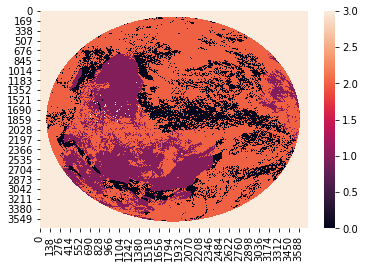

In [25]:
sns.heatmap(data['CLOUDM_P30_GSV0_I207'].values)

In [26]:
# 3 -off earth disk
# 2 - cloud
# 1 - not cloud over ocean and 0 not cloud over land

In [27]:
def fix_one_sat_file(filename):
    """
    filename : str
        full absoulute path to file.
    
    This reads a raw satelite file.
    Add time, longitude, latitude.
    """
    data = xr.open_dataset(filename, engine="pynio")

    ts = timestamp(filename)
    data['time'] = ts
    
    # Add time as a coordinate and dimension. 
    data = data.assign_coords(time = data.time)
    data = data.expand_dims(dim = 'time')
        
    # Rename dimenstions and coordinates 
    data = data.rename(name_dict={'xgrid_0': 'longitude', 
                                  'ygrid_0':'latitude', 
                                  'CLOUDM_P30_GSV0_I207':'tcc'}, inplace=True)
    # crop to correct region 
    # data = data.sel(latitude = slice(30,60))
    # data = data.sel(longitude = slice(-15, 42))

    tcc, counting = calc_all(data.tcc.values)
    
    data['tcc'].values = tcc
    data['xgrid_0'] = np.arange(-15, 42+0.75, 0.75)
    data['ygrid_0'] = np.arange(30, 60+0.75, 0.75)
    
    return data

In [112]:
rootgrp = Dataset(nc_files[0], "r", format="NETCDF4")
cloud_mask_array = rootgrp.variables["cloudMask"][:].data
lat_array = rootgrp.variables["lat"][:].data
lon_array = rootgrp.variables["lon"][:].data

In [103]:
lat_array[lat_array > 60] = np.nan 
lat_array[lat_array < 30] = np.nan 
lon_array[lon_array > 40] = np.nan
lon_array[lon_array < -15] = np.nan

/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


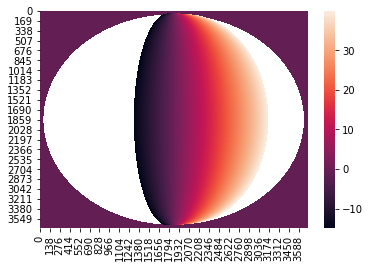

In [104]:
sns.heatmap(lon_array)

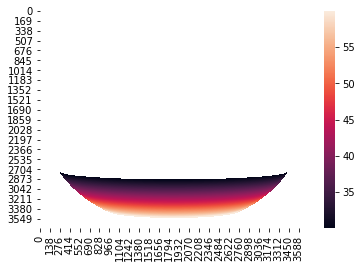

In [105]:
sns.heatmap(lat_array)

In [28]:
lat_nc = rootgrp.variables["lat"][:].data
lon_nc = rootgrp.variables["lon"][:].data

NameError: name 'rootgrp' is not defined

In [119]:
lon = -15
lat = 30

dlon = 0.75/2
dlat = 0.75/2

minLat = lat - dlat
maxLat = lat + dlat

# OBS! Problem with sign when it comes to longitude 
a = lon - dlon
b = lon + dlon
minLon = np.min([a, b])
maxLon = np.max([a, b])

In [121]:
x_idx, y_idx = np.where((lon_nc > minLon) & (lon_nc < maxLon) & (lat_nc > minLat) & (lat_nc < maxLat))
X = np.unique(x_idx)
Y = np.unique(y_idx)

In [127]:
np.mean(lon_nc[X, :][:, Y])

-15.010457

In [128]:
np.mean(lat_nc[X, :][:, Y])

30.000273

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(cloud_mask_array)

In [42]:
a = data['CLOUDM_P30_GSV0_I207'].values

In [43]:
a

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]], dtype=float32)

In [44]:
a[a == 3.]= 9999

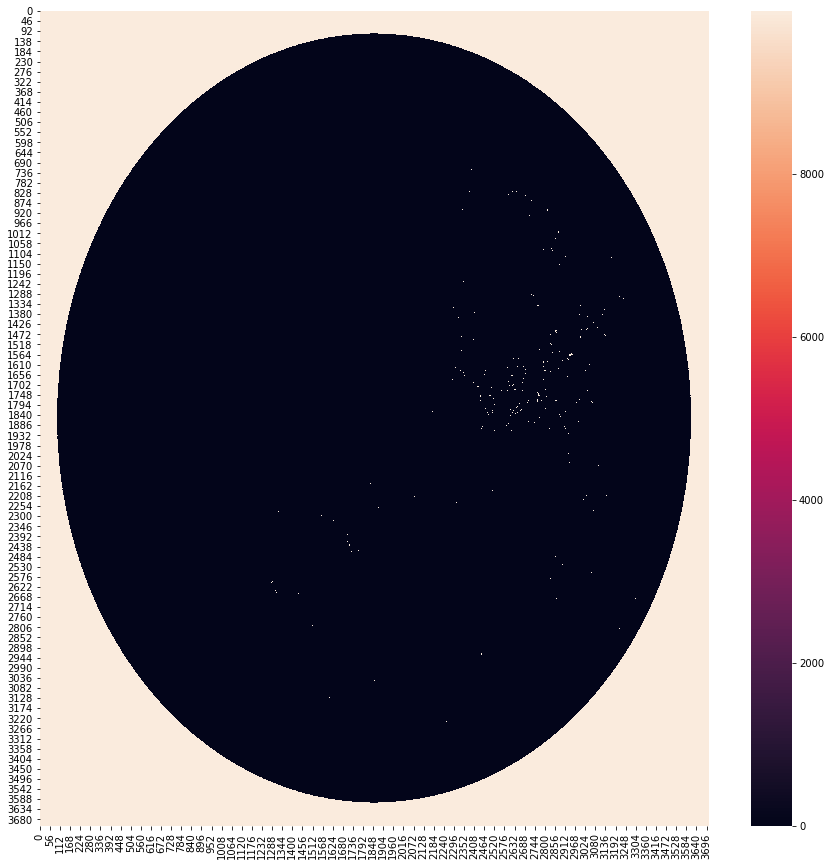

In [45]:
plt.figure(figsize = (15,15) )
sns.heatmap(np.fliplr(a))

In [132]:
def calc_one_mean(lon, lat, lon_nc, lat_nc, clm_grb):
    """
    lon : float 
        single value of the cell you want to calc mean to.
        
    lat : float
        same as above
    
    lon_nc : 2D array
        array containg all the lons fron the netcdf files.
    
    lat_nc : 2D array
        array containg all the lat fron the netcdf files.
    
    clm_grb : 2Darray 
        data from the grib file.
        
    Notes
    ------------------------------
    The grib file needs too be flipped left and right in order to 
    
    
    """
    
    dlon = 0.75/2
    dlat = 0.75/2
    
    minLat = lat - dlat
    maxLat = lat + dlat
    
    # OBS! Problem with sign when it comes to longitude 
    a = lon - dlon
    b = lon + dlon
    minLon = np.min([a, b])
    maxLon = np.max([a, b])
    
    # Find the index of the cell which correspond to the 
    x_idx, y_idx = np.where((lon_nc > minLon) & (lon_nc < maxLon) & (lat_nc > minLat) & (lat_nc < maxLat))
    X = np.unique(x_idx)
    Y = np.unique(y_idx)
    
    #cloud_flipped = np.fliplr(clm_grb) 
    # need to flip the grib file so its on the same format as netcdf file where we get the coordinates.
    
    # TODO: maybee you need to look at the box around the satelitte image 
    meanLon = np.mean(  lon_nc[X, :][:, Y]    )
    meanLat = np.mean(  lat_nc[X, :][:, Y]   )
    
    
    #todo wich back 
    cloud_flipped = clm_grb
    
    # retrieve cloud mask
    submat = cloud_flipped[X, :][:, Y]
    if (submat == 3).sum() > 0: # 3 denotes of earth disk. The cloud data can only originate from inside the earth disk
        print("OBS the nr 3. lon: {} lat: {}   || meanlon {} mean lat {}".format(lon, lat, meanLon, meanLat))
    submat[submat == 1] = 0 # no cloud over ocean --> no cloud 
    submat[submat == 2] = 1 # skyer denoted 1 --> praktisk for å beregne cloud fraction
    cloud_fraction = submat.mean()
    _x, _y = submat.shape
    count = int(_x*_y)
    
    return cloud_fraction, count
    
    

In [133]:
def calc_all(clm_grb):
    """
    Data from a grib file.
    """
    rootgrp = Dataset(nc_files[0], "r", format="NETCDF4")
    cloud_mask_array = rootgrp.variables["cloudMask"][:].data
    lat_array = rootgrp.variables["lat"][:].data
    lon_array = rootgrp.variables["lon"][:].data
    
    lat_array[lat_array > 60] = 0
    lat_array[lat_array < 30] = 0 
    lon_array[lon_array > 40] = 0
    lon_array[lon_array < -15] = 0
    
    true_lat = np.arange(30, 58+0.75, 0.75)
    true_lon = np.arange(-15, 38+0.75, 0.75)
    
    _x = len(true_lat)
    _y= len(true_lon)
    
    counting = np.zeros((_x, _y))
    cloud_fractions = np.zeros((_x, _y))
    
    for i, la in enumerate(true_lat):
        for j, lo in enumerate(true_lon):   
            
            cloud_fraction, count = calc_one_mean(lo, 
                                                  la, 
                                                  lon_array, 
                                                  lat_array, 
                                                  cloud_mask_array) # todo swap back to grb fil

            counting[i,j] = count
            cloud_fractions[i,j] = cloud_fraction
  
    return cloud_fractions, counting

In [134]:
clm, counting = calc_all(data['CLOUDM_P30_GSV0_I207'].values)

OBS the nr 3. lon: -9.75 lat: 30.0   || meanlon -9.753350257873535 mean lat 29.14710807800293
OBS the nr 3. lon: 0.0 lat: 30.0   || meanlon 0.23421815037727356 mean lat 12.1493558883667
OBS the nr 3. lon: -9.75 lat: 30.75   || meanlon -9.751562118530273 mean lat 30.736478805541992
OBS the nr 3. lon: -2.25 lat: 30.75   || meanlon -2.265230417251587 mean lat 30.755407333374023
OBS the nr 3. lon: 0.0 lat: 30.75   || meanlon 0.2762271761894226 mean lat 15.647048950195312
OBS the nr 3. lon: 20.25 lat: 30.75   || meanlon 20.257537841796875 mean lat 30.748966217041016
OBS the nr 3. lon: 29.25 lat: 30.75   || meanlon 29.24966049194336 mean lat 30.74060821533203
OBS the nr 3. lon: 30.0 lat: 30.75   || meanlon 30.00132179260254 mean lat 30.743806838989258
OBS the nr 3. lon: 0.0 lat: 31.5   || meanlon 0.2912852466106415 mean lat 20.184865951538086
OBS the nr 3. lon: 19.5 lat: 31.5   || meanlon 19.4932918548584 mean lat 31.50250244140625
OBS the nr 3. lon: 20.25 lat: 31.5   || meanlon 20.254596710

OBS the nr 3. lon: 0.0 lat: 47.25   || meanlon 0.5616832375526428 mean lat 40.4329833984375
OBS the nr 3. lon: 0.0 lat: 48.0   || meanlon 0.5990555882453918 mean lat 40.77532958984375
OBS the nr 3. lon: 0.0 lat: 48.75   || meanlon 0.5954900979995728 mean lat 41.20982360839844
OBS the nr 3. lon: 0.0 lat: 49.5   || meanlon 0.5992759466171265 mean lat 41.65855407714844
OBS the nr 3. lon: 0.0 lat: 50.25   || meanlon 0.6588965058326721 mean lat 42.026824951171875
OBS the nr 3. lon: 0.0 lat: 51.0   || meanlon 0.667025625705719 mean lat 42.44884490966797
OBS the nr 3. lon: 0.0 lat: 51.75   || meanlon 0.6526477932929993 mean lat 42.812992095947266
OBS the nr 3. lon: 0.0 lat: 52.5   || meanlon 0.689974308013916 mean lat 43.213218688964844
OBS the nr 3. lon: 0.0 lat: 53.25   || meanlon 0.7187132239341736 mean lat 43.58266830444336
OBS the nr 3. lon: 0.0 lat: 54.0   || meanlon 0.7054308652877808 mean lat 43.956722259521484
OBS the nr 3. lon: 0.0 lat: 54.75   || meanlon 0.7421091198921204 mean lat

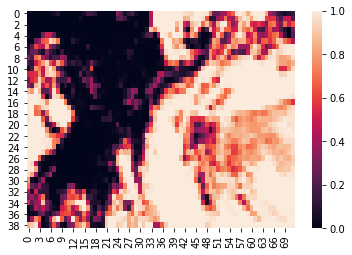

In [55]:
sns.heatmap(clm)

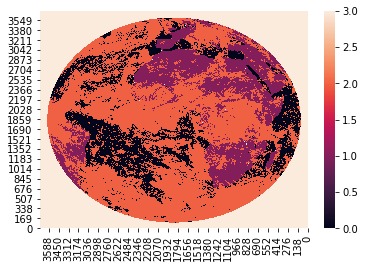

In [234]:
ax = sns.heatmap(data['CLOUDM_P30_GSV0_I207'].values)
ax.invert_yaxis()
ax.invert_xaxis()

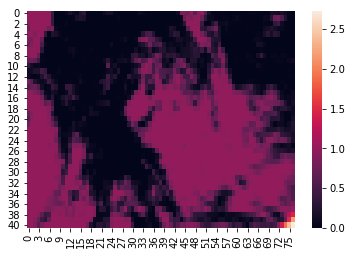

In [227]:
ax = sns.heatmap(clm)
#ax.invert_yaxis()

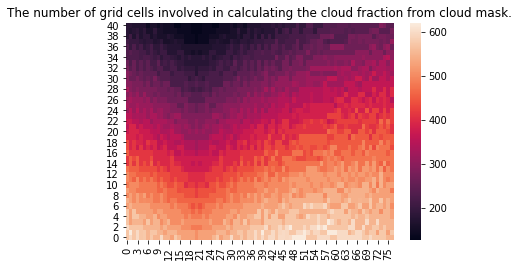

In [224]:
ax = sns.heatmap(counting)
ax.invert_yaxis()
ax.set_title("The number of grid cells involved in calculating the cloud fraction from cloud mask.");

In [ ]:
ds = xr.Dataset({'tcc': (['x', 'y', 'time'],  tcc),},
                 coords={'longitude': (['x', 'y'], lon),
                         'latitude': (['x', 'y'], lat),
                           'time': timestamp(grb_file),})

In [231]:
import seaborn as sns

In [196]:
cloud_mask_array = np.flip(rootgrp.variables["cloudMask"][:].data)

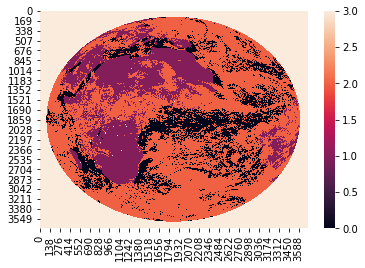

In [197]:
sns.heatmap(cloud_mask_array) # nc with correct coordinates

In [185]:
a = np.fliplr(data['CLOUDM_P30_GSV0_I207'].values)

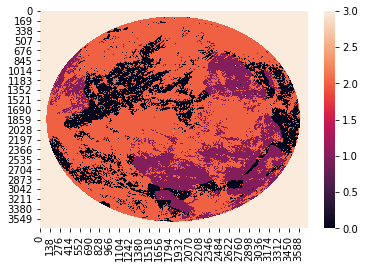

In [186]:
sns.heatmap(a)

In [179]:
a = np.fliplr(data['CLOUDM_P30_GSV0_I207'].values)

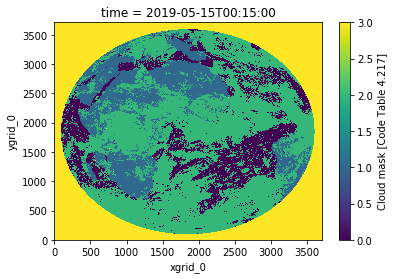

In [177]:
data['CLOUDM_P30_GSV0_I207'].plot()

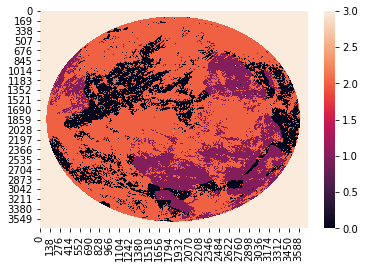

In [180]:
sns.heatmap(a)

In [115]:
rows = cloud_mask_array[X, :]
submat = rows[:, Y]
submat.shape

(23, 27)

In [181]:
# Todo plot netcdf of se hvordan det ser ut 

## OBS! sjekk om det ceteret i cellen som lat, lon. Hvordan korrigere for dette. 

In [119]:
# 3 -off earth disk
# 2 - cloud
# 1 - not cloud over ocean and 0 not cloud over land

In [120]:
submat[submat == 1] = 0 # no cloud over ocean --> no cloud 

In [ ]:
submat[submat == 2] = 1 # skyer denoted 1 --> praktisk for å beregne cloud fraction

In [123]:
submat.mean()

0.85507244

In [116]:
sum(submat == 3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

# Check that the cloud cover only contain 0,1,2 replace all 2
## replace so that its zero and 0 and 1. 
### Maybee you should replace 

In [193]:
row = lon_array[X,:]
row[:,Y]

array([[-14.996124 , -14.962436 , -14.928756 , -14.895085 , -14.8614235,
        -14.82777  , -14.7941265, -14.760491 , -14.726865 , -14.693248 ,
        -14.659638 , -14.626039 , -14.592447 , -14.558865 , -14.5252905,
        -14.491725 , -14.458168 , -14.42462  , -14.39108  , -14.357549 ,
        -14.324026 , -14.290512 , -14.257007 , -14.22351  , -14.190021 ,
        -14.15654  , -14.123068 ],
       [-15.002226 , -14.968522 , -14.934828 , -14.901142 , -14.867465 ,
        -14.833797 , -14.800138 , -14.766488 , -14.732847 , -14.699215 ,
        -14.665591 , -14.631976 , -14.59837  , -14.564772 , -14.531183 ,
        -14.497602 , -14.464031 , -14.430469 , -14.396914 , -14.363368 ,
        -14.32983  , -14.296302 , -14.262781 , -14.229269 , -14.1957655,
        -14.162271 , -14.128784 ],
       [-15.008342 , -14.974623 , -14.940913 , -14.907213 , -14.873521 ,
        -14.839838 , -14.806164 , -14.772499 , -14.738843 , -14.705195 ,
        -14.671556 , -14.637927 , -14.604306 , -14.570

## Make a map 

In [46]:
import cartopy.crs as ccrs

In [49]:
import cartopy as cp
def plot_map(lat = (30,60), lon = (-30,35), path = "maps/",
    title = "MeteoSat vision Europa", filename = "MeteoSat_vision_Europa.png"):
    """
    Plot map defined by lat lon, default Europe.
    Path should be to lagringshotell, don't save png's on git ...
    """
    plt.figure(figsize = (15,15))
    ax = plt.axes(projection = ccrs.PlateCarree())

    ax.add_feature(cp.feature.OCEAN, zorder=0)
    ax.add_feature(cp.feature.LAND, zorder=0, edgecolor='black')
    ax.coastlines(resolution='50m')
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], ccrs.PlateCarree())

    props = dict(boxstyle='round', facecolor='wheat', alpha=1.)

    ax.text(0.03, 0.07, "MeteoSat vision Europa", transform=ax.transAxes, fontsize=20,
            verticalalignment='top', bbox=props)

    #plt.savefig(path + filename, bbox_inces = "thight")
    plt.show()

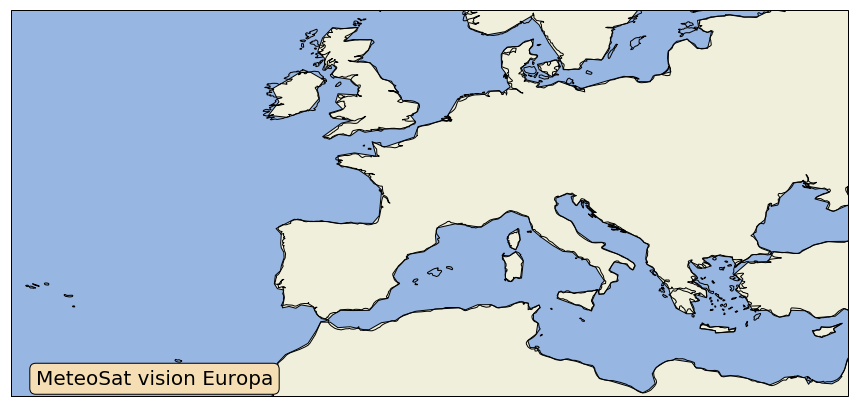

In [50]:
plot_map()

### FIgure out how to crop this and not ge a disk 

In [44]:
d = data['p260537'].values

In [45]:
dim = int(np.sqrt(len(d)))

In [46]:
dim

3712

In [47]:
d = d.reshape((dim, dim ))

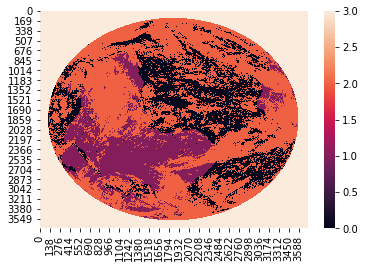

In [48]:
sns.heatmap(d)

In [4]:
path = '/uio/hume/student-u89/hannasv/tempSAT/archive.eumetsat.int/umarf/onlinedownload/hannasv/1337166/'

In [5]:
files = glob.glob(path+"*.grb")

In [6]:
files

['/uio/hume/student-u89/hannasv/tempSAT/archive.eumetsat.int/umarf/onlinedownload/hannasv/1337166/MSG4-SEVI-MSGCLMK-0100-0100-20190605000000.000000000Z-20190605001353-1337166.grb',
 '/uio/hume/student-u89/hannasv/tempSAT/archive.eumetsat.int/umarf/onlinedownload/hannasv/1337166/MSG4-SEVI-MSGCLMK-0100-0100-20190605060000.000000000Z-20190605061402-1337166.grb',
 '/uio/hume/student-u89/hannasv/tempSAT/archive.eumetsat.int/umarf/onlinedownload/hannasv/1337166/MSG4-SEVI-MSGCLMK-0100-0100-20190605120000.000000000Z-20190605121404-1337166.grb',
 '/uio/hume/student-u89/hannasv/tempSAT/archive.eumetsat.int/umarf/onlinedownload/hannasv/1337166/MSG4-SEVI-MSGCLMK-0100-0100-20190605180000.000000000Z-20190605181414-1337166.grb']

In [7]:
first_file = files[0]

In [8]:
first_file

'/uio/hume/student-u89/hannasv/tempSAT/archive.eumetsat.int/umarf/onlinedownload/hannasv/1337166/MSG4-SEVI-MSGCLMK-0100-0100-20190605000000.000000000Z-20190605001353-1337166.grb'

In [21]:
import seaborn as sns